
# Real Business Cycle (RBC) Model Analysis

In this notebook, we'll analyze a Real Business Cycle (RBC) model. The analysis includes:
1. **Model Description**: Introduce the model equations and explain their significance.
2. **Steady State Computation**: Calculate the steady state for the RBC model.
3. **Log-Linearization and Solution**: Linearize the model and solve it using numerical techniques.
4. **Simulation**: Simulate the RBC model to observe behavior under different conditions.

We'll be using out RBC model implementation in `rbc_model.py`.


In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from rbc_model import RBCModel

# Set model parameters (based on empirical approximations)
parameters = pd.Series({
    'alpha': 0.35,  # Capital share of output
    'beta': 0.99,   # Discount factor
    'delta': 0.025, # Depreciation rate
    'rhoa': 0.9,    # Persistence of technology shocks
    'sigma': 1.5    # Risk aversion
})

# Initialize the RBC model
rbc = RBCModel(parameters)



## Model Description

The Real Business Cycle (RBC) model is based on a simple economy with capital and productivity shocks. Here are the key equations:

1. **Household Euler Equation**: Balances intertemporal consumption choices based on future returns.

$$ 
 C_t^{-\sigma} = \beta E_t[C_{t+1}^{-\sigma}(\alpha A_{t+1} K_{t+1}^{\alpha-1} + 1 - \delta)
$$

2. **Production Function**: Relates capital and technology to output.

$$ 
Y_t = A_t K_t^{\alpha}
$$


3. **Capital Evolution**: Defines how the capital stock changes over time.
    $$
    K_{t+1} = (1 - \delta) K_t + I_t
    $$
    
4. **Market Clearing**: Ensures that all output is either consumed or invested.
    $$
    Y_t = C_t + I_t
    $$
    
5. **Exogenous Technology Process**: Specifies the evolution of technology shocks.
    $$
    \log A_t = \rho_a \log A_{t-1} + \epsilon_t
    $$


## Steady State Computation
Now, we compute the nonstochastic steady state of the model. The .compute_ss() method can be used to compute the steady state numerically. The method's default is to use scipy's fsolve() function..... COME BACK

In [2]:
# Initial guess for steady-state values
guess = [1, 1, 1, 1, 1]
rbc.compute_ss(guess)
print("Steady State Values:\n", rbc.ss)


Steady State Values:
 a     1.000000
k    34.398226
c     2.589794
y     3.449750
i     0.859956
dtype: float64


## Log-Linearization and Solution

EXPLAIN

In [3]:

# Perform log-linear approximation around steady state
rbc.log_linear_approximation()
print("Matrix A (Log-Linear Approximation):\n", rbc.a)
print("Matrix B (Log-Linear Approximation):\n", rbc.b)

# Solve the linearized model
rbc.solve_klein()
print("Matrix F (Klein Solution):\n", rbc.f)
print("Matrix P (Klein Solution):\n", rbc.p)


Matrix A (Log-Linear Approximation):
 [[0.3465 0.    ]
 [0.     0.    ]]
Matrix B (Log-Linear Approximation):
 [[0.5]
 [0. ]]
Matrix F (Klein Solution):
 [[0.5 0.5]
 [0.1 0.9]]
Matrix P (Klein Solution):
 [[0.8 0.2]
 [0.3 0.7]]


## Model Simulation

EXPLAIN

Simulated Data (First 5 Rows):
           k         y
0  0.869718  0.552229
1  1.533731  1.844406
2  1.454918  1.579196
3  2.933914  2.577737
4  2.488758  2.852304


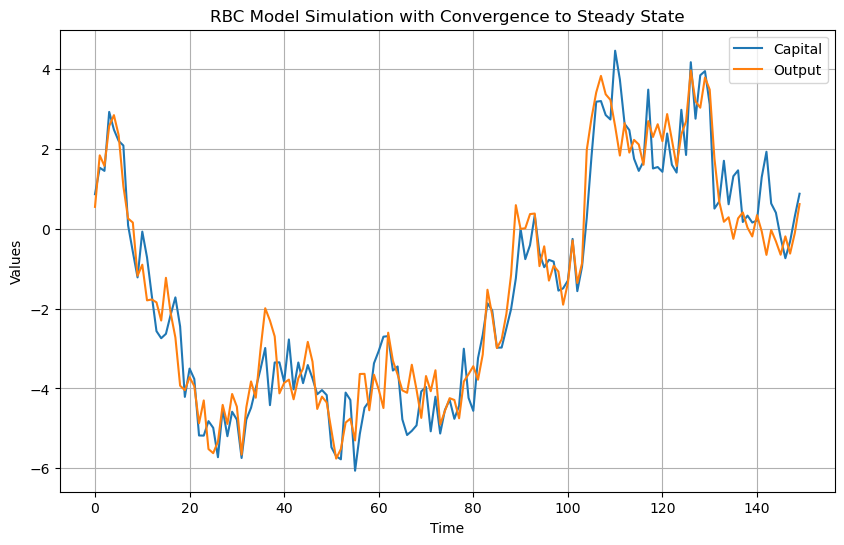

In [15]:

# Simulate the RBC model for 150 periods with a random seed
sim_data = rbc.simulate_model(T=150, seed=42)
print("Simulated Data (First 5 Rows):\n", sim_data.head())

# Plot the simulation results
plt.figure(figsize=(10, 6))
plt.plot(sim_data['k'], label='Capital')
plt.plot(sim_data['y'], label='Output')
plt.xlabel("Time")
plt.ylabel("Values")
plt.legend()
plt.title("RBC Model Simulation with Convergence to Steady State")
plt.grid(True)
plt.show()


FORBEDRE DENNE DEL, KAN IKKE LIDE!

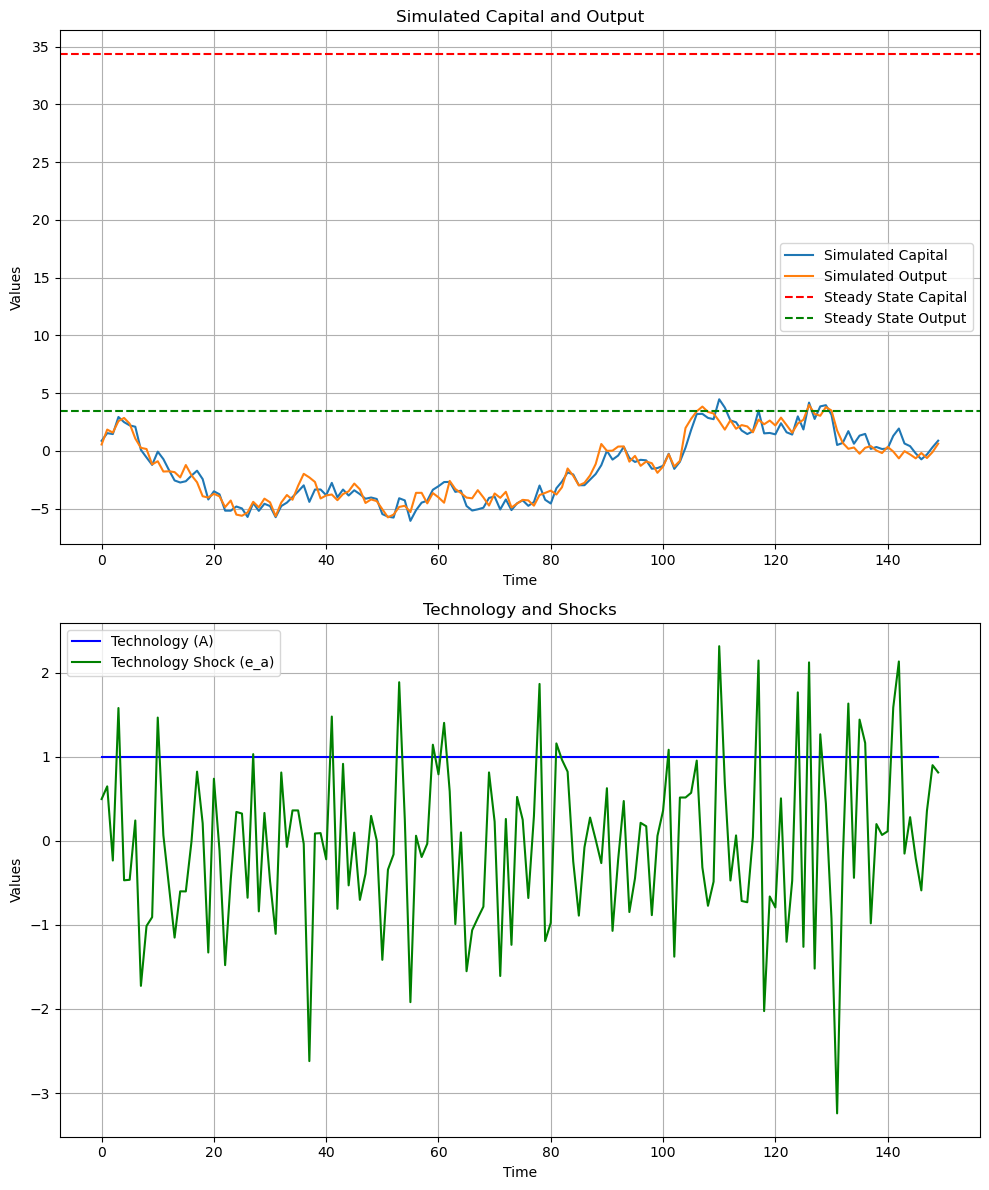

In [13]:

# Function to compute steady-state values
def compute_steady_state(parameters):
    alpha = parameters['alpha']
    beta = parameters['beta']
    delta = parameters['delta']

    # Steady-state technology (normalized to 1)
    A = 1.0

    # Steady-state capital (k) derived analytically
    k_ss = ((alpha * A) / (1 / beta + delta - 1))**(1 / (1 - alpha))

    # Steady-state output (y)
    y_ss = A * k_ss**alpha

    # Steady-state consumption (c)
    c_ss = y_ss - delta * k_ss

    # Steady-state investment (i)
    i_ss = delta * k_ss

    # Return steady-state values as a pandas Series
    return pd.Series([A, k_ss, c_ss, y_ss, i_ss], index=['a', 'k', 'c', 'y', 'i'])

# Set the parameters
parameters = pd.Series({
    'alpha': 0.35,  # Capital share of output
    'beta': 0.99,   # Discount factor
    'delta': 0.025, # Depreciation rate
    'rhoa': 0.9,    # Persistence of technology shocks
    'sigma': 1.5    # Risk aversion
})

# Compute steady-state values
steady_state = compute_steady_state(parameters)

# Function to simulate the RBC model
def simulate_rbc(T=150, seed=None):
    if seed is not None:
        np.random.seed(seed)

    # Matrices from log-linear approximation or numerical solution
    F = np.array([[0.5, 0.5], [0.1, 0.9]])
    P = np.array([[0.8, 0.2], [0.3, 0.7]])

    # Initialize simulation data
    sim_data = np.zeros((T, 4))
    state = np.array([0.5, 0.5])
    shock = np.random.randn(2)

    for t in range(T):
        state = F @ state + P @ shock
        sim_data[t, :2] = state
        sim_data[t, 2] = steady_state['a']
        sim_data[t, 3] = shock[0]
        shock = np.random.randn(2)

    return pd.DataFrame(sim_data, columns=['k', 'y', 'a', 'e_a'])

# Simulate the model
sim_data = simulate_rbc(T=150, seed=42)

# Plot the simulation with steady-state references
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# Plot panel 1 (k, c, y, i)
ax1.plot(sim_data['k'], label='Simulated Capital')
ax1.plot(sim_data['y'], label='Simulated Output')
ax1.axhline(y=steady_state['k'], color='red', linestyle='--', label='Steady State Capital')
ax1.axhline(y=steady_state['y'], color='green', linestyle='--', label='Steady State Output')
ax1.set_xlabel("Time")
ax1.set_ylabel("Values")
ax1.legend()
ax1.grid(True)
ax1.set_title("Simulated Capital and Output")

# Plot panel 2 (a, e_a)
ax2.plot(sim_data['a'], label='Technology (A)', color='blue')
ax2.plot(sim_data['e_a'], label='Technology Shock (e_a)', color='green')
ax2.set_xlabel("Time")
ax2.set_ylabel("Values")
ax2.legend()
ax2.grid(True)
ax2.set_title("Technology and Shocks")

plt.tight_layout()
plt.show()


EN DEL HVOR VI SKIFTER I PARAMTERENE, SÅ VI KAN SE, HVAD DER SKER MED SIMULATIONEN. FX SKIFTER VI PÅ DELTA PARAMETERNE, OG SER HVAD DER SKER MED KONVERGENSEN OSV.